7.	Собрать установку для измерения данных ЭМГ, передать данные на ПК с помощью pySerial, произвести замеры для 5 мышц и выявить движения, дающие максимальный сигнал

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [31]:
def detectMovement(filteredFrame, rate, maxMissLenght, minDetectLength):
    filteredEMG = filteredFrame.to_numpy()

    upperPercentile = numpy.percentile(filteredEMG, 96)

    detect = []
    detectStart = 0
    missCount = 0
    detectLength = 0

    for i in range(len(filteredEMG)):
        if (filteredEMG[i] > upperPercentile):
            if (detectStart == 0):
                detectStart = i
                detectLength = 1
                missCount = 0
            else:
                detectLength += 1 + missCount
                missCount = 0
        else:
            if (detectStart == 0):
                detect.append(0)
            else:
                missCount += 1

        if (missCount >= maxMissLenght):
            if (detectLength > minDetectLength):
                for j in range(detectLength):
                    detect.append(1)
                for j in range(missCount):
                    detect.append(0)
            else:
                for j in range(detectLength + missCount):
                    detect.append(0)

            detectStart = 0
            missCount = 0
            detectLength = 0

    for j in range(detectLength):
        detect.append(1)
    for j in range(missCount):
        detect.append(0)

    return detect

# Шея

In [32]:
emgFrame = pd.read_table("EMG_neck.dat", sep='	', names=["time", "value"], header=None)
emgFrame.reset_index(inplace = True)
emgFrame.pop("time")
emgFrame.head()

,index,value
0,0,2.568627
1,1,2.549020
2,2,2.549020
3,3,2.568627
4,4,2.588235


In [33]:
meanEMG = emgFrame["value"].mean()
emgFrame["meanedValue"] = emgFrame["value"] - meanEMG
emgFrame["meanedValue"] = emgFrame["meanedValue"].abs()

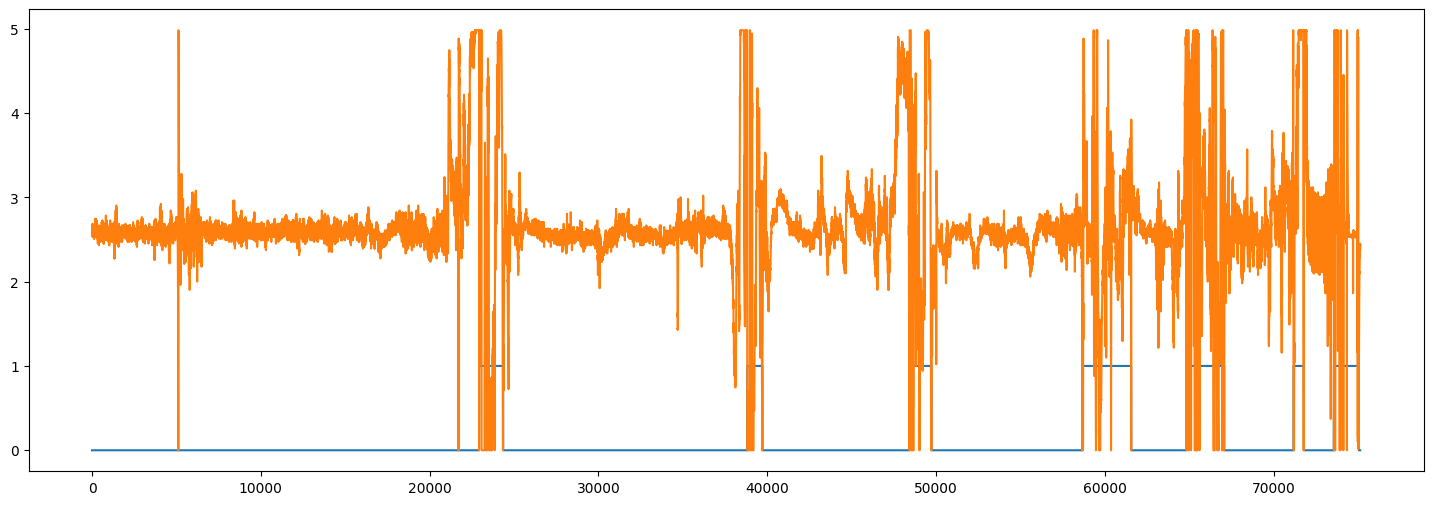

In [35]:
detect = detectMovement(emgFrame["meanedValue"], 300, 1200, 100)
plt.figure(figsize=(18, 6))
plt.plot(detect)
plt.plot(emgFrame["value"])
plt.show()

Глотание практически не видны
Наклоны головы явно видны на графике

# Бровь

In [36]:
emgFrame = pd.read_table("EMG_eyebrow.dat", sep='	', names=["time", "value"], header=None)
emgFrame.reset_index(inplace = True)
emgFrame.pop("time")
emgFrame.head()

,index,value
0,0,2.568627
1,1,2.745098
2,2,2.784314
3,3,2.627451
4,4,2.490196


In [37]:
meanEMG = emgFrame["value"].mean()
emgFrame["meanedValue"] = emgFrame["value"] - meanEMG
emgFrame["meanedValue"] = emgFrame["meanedValue"].abs()

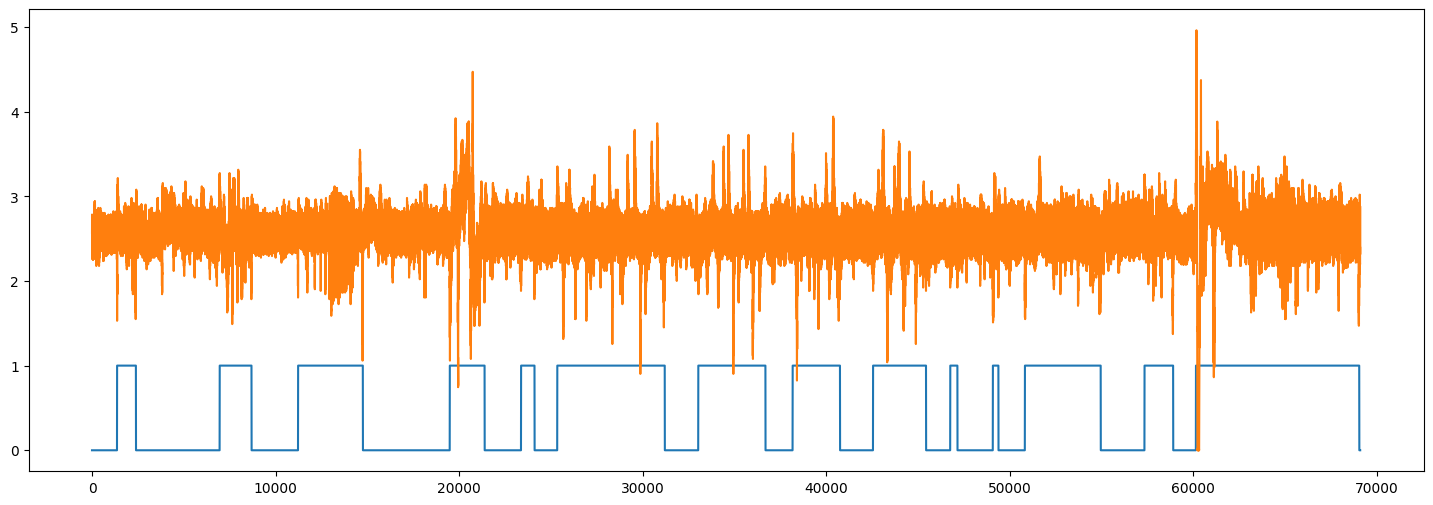

In [39]:
detect = detectMovement(emgFrame["meanedValue"], 300, 1200, 100)
plt.figure(figsize=(18, 6))
plt.plot(detect)
plt.plot(emgFrame["value"])
plt.show()

Моргания создают шумы
Частые моргания интерпретируются как одно движение
Движения бровей явно видны на графике

# Челюсть

In [40]:
emgFrame = pd.read_table("EMG_jaw.dat", sep='	', names=["time", "value"], header=None)
emgFrame.reset_index(inplace = True)
emgFrame.pop("time")
emgFrame.head()

,index,value
0,0,2.470588
1,1,2.450980
2,2,2.431373
3,3,2.411765
4,4,2.392157


In [41]:
meanEMG = emgFrame["value"].mean()
emgFrame["meanedValue"] = emgFrame["value"] - meanEMG
emgFrame["meanedValue"] = emgFrame["meanedValue"].abs()

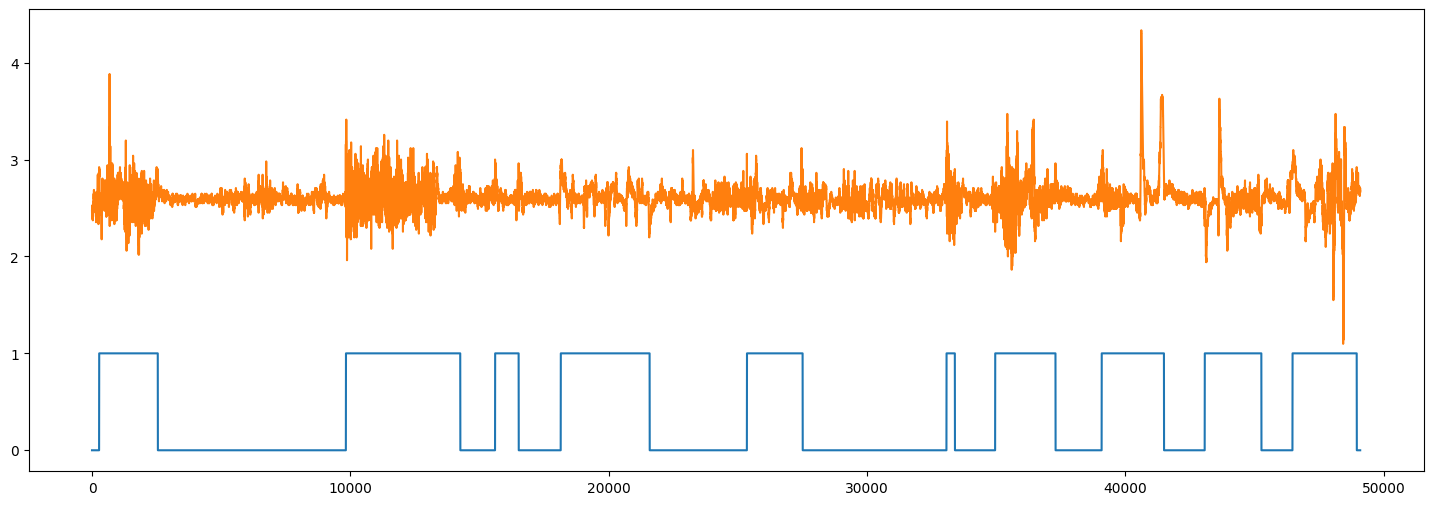

In [43]:
detect = detectMovement(emgFrame["meanedValue"], 300, 1200, 100)
plt.figure(figsize=(18, 6))
plt.plot(detect)
plt.plot(emgFrame["value"])
plt.show()

Сжатие челюсти видно на графике - средняя амплитуда
Улыбка - небольшая амплитуда
Открытие и закрытие челюсти - высокая амплитуда

# Бицепс

In [44]:
emgFrame = pd.read_table("EMG_biceps.dat", sep='	', names=["time", "value"], header=None)
emgFrame.reset_index(inplace = True)
emgFrame.pop("time")
emgFrame.head()

,index,value
0,0,2.529412
1,1,2.509804
2,2,2.529412
3,3,2.509804
4,4,2.470588


In [45]:
meanEMG = emgFrame["value"].mean()
emgFrame["meanedValue"] = emgFrame["value"] - meanEMG
emgFrame["meanedValue"] = emgFrame["meanedValue"].abs()

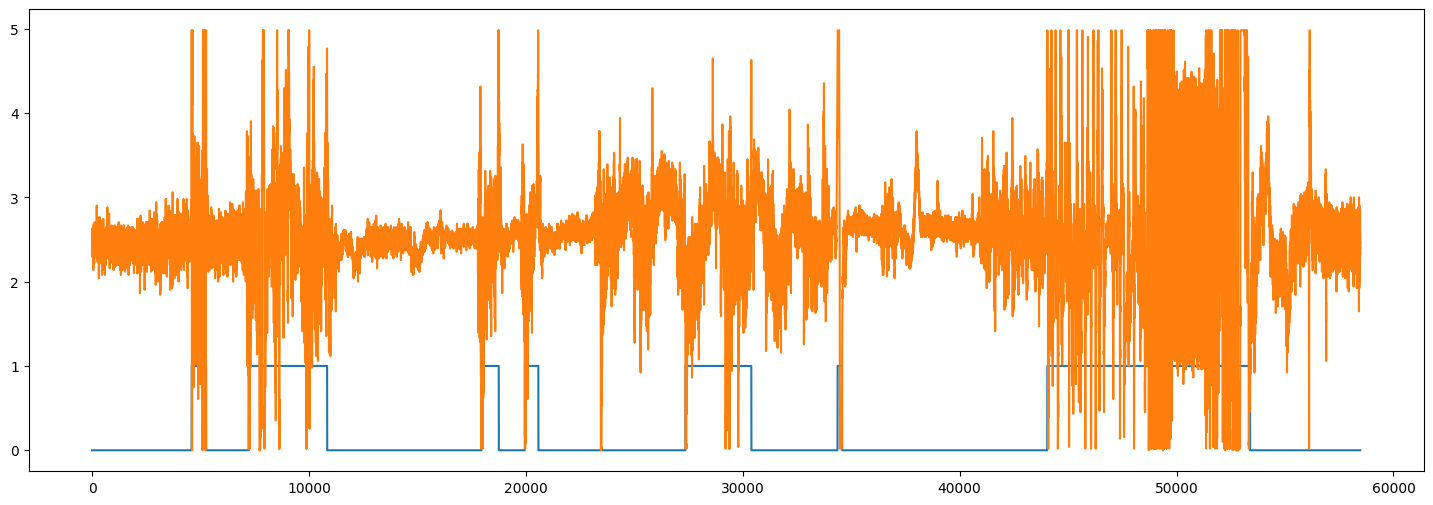

In [47]:
detect = detectMovement(emgFrame["meanedValue"], 300, 1200, 100)
plt.figure(figsize=(18, 6))
plt.plot(detect)
plt.plot(emgFrame["value"])
plt.show()

При сгибании и разгибании средняя интенсивность
Если напрягать - интенсивный сигнал явно виден на графике

# Кисть

In [48]:
emgFrame = pd.read_table("EMG_arm.dat", sep='	', names=["time", "value"], header=None)
emgFrame.reset_index(inplace = True)
emgFrame.pop("time")
emgFrame.head()

,index,value
0,0,2.352941
1,1,2.411765
2,2,2.313725
3,3,2.333333
4,4,2.392157


In [49]:
meanEMG = emgFrame["value"].mean()
emgFrame["meanedValue"] = emgFrame["value"] - meanEMG
emgFrame["meanedValue"] = emgFrame["meanedValue"].abs()

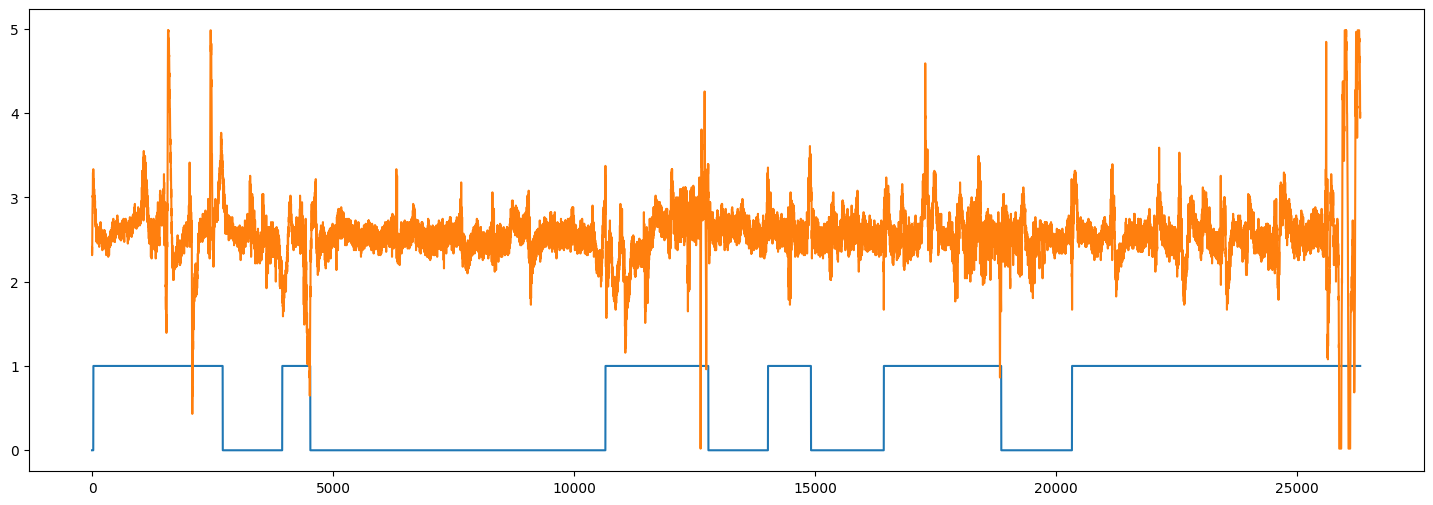

In [51]:
detect = detectMovement(emgFrame["meanedValue"], 300, 1200, 100)
plt.figure(figsize=(18, 6))
plt.plot(detect)
plt.plot(emgFrame["value"])
plt.show()

При сжатии в кулак амплитуда сигнала большая
При сгибании и разгибании сухожилия - периодичные сигналы средней интенсивности

# Выводы

Наибольшая амплитуда сигналов была получена с бицепса и шеи

Самое сильное напряжение мышц получились в результате поворота головы и напряжения бицепса
